In [1]:
!pip install imbalanced-learn

     |████████████████████████████████| 235 kB 1.3 MB/s eta 0:00:01
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
label-studio-converter 0.0.39 requires Pillow==9.0.0, but you have pillow 10.0.1 which is incompatible.


We are importing the necessary libraries. `matplotlib` for plotting, `sklearn` for data generation, model training, and evaluation, and `imbalanced-learn` for re-sampling strategies.


In [70]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import numpy as np

Here, we generate a synthetic imbalanced dataset using the `make_classification` function from scikit-learn, and then split it into training and testing sets using the `train_test_split` function.

In [71]:
# Create a synthetic imbalanced dataset
X, y = make_classification(
    n_classes=2, class_sep=0.6,
    weights=[0.90, 0.10],  # 90% of samples belong to class 0
    n_informative=3, n_redundant=0,
    flip_y=0, n_features=10,
    n_clusters_per_class=1, n_samples=2000,
    random_state=42
)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We train a logistic regression classifier on the original (imbalanced) data and evaluate its performance on the testing set using a classification report, which provides precision, recall, and F1-score.

In [72]:
# Train a logistic regression classifier on the original data
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
print("Classification Report on Original Data:")
print(classification_report(y_test, clf.predict(X_test)))

Classification Report on Original Data:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       358
           1       0.00      0.00      0.00        42

    accuracy                           0.88       400
   macro avg       0.45      0.49      0.47       400
weighted avg       0.80      0.88      0.84       400



We apply under-sampling to balance the class distribution in the training data, train a new logistic regression classifier on the under-sampled data, and evaluate its performance on the testing set.

In [73]:
# Under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Train a logistic regression classifier on the under-sampled data
clf_rus = LogisticRegression(random_state=42)
clf_rus.fit(X_train_rus, y_train_rus)
print("Classification Report on Under-sampled Data:")
print(classification_report(y_test, clf_rus.predict(X_test)))

Classification Report on Under-sampled Data:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       358
           1       0.33      1.00      0.49        42

    accuracy                           0.79       400
   macro avg       0.66      0.88      0.68       400
weighted avg       0.93      0.79      0.82       400



Similarly, we apply over-sampling to balance the class distribution in the training data, train a new logistic regression classifier on the over-sampled data, and evaluate its performance on the testing set.

In [74]:
# Over-sampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Train a logistic regression classifier on the over-sampled data
clf_ros = LogisticRegression(random_state=42)
clf_ros.fit(X_train_ros, y_train_ros)
print("Classification Report on Over-sampled Data:")
print(classification_report(y_test, clf_ros.predict(X_test)))


Classification Report on Over-sampled Data:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       358
           1       0.32      1.00      0.49        42

    accuracy                           0.78       400
   macro avg       0.66      0.88      0.67       400
weighted avg       0.93      0.78      0.82       400



Finally, we define a function to plot the class distribution using a bar plot and visualize the class distribution of the training data before and after under-sampling and over-sampling. This provides a clear visual confirmation of the effect of the re-sampling strategies.

In [76]:
# Function to plot class distribution
def plot_class_distribution(y, title):
    unique, counts = np.unique(y, return_counts=True)
    plt.bar(unique, counts, tick_label=['0', '1'])
    plt.title(title)
    plt.xlabel('Class Label')
    plt.ylabel('Frequency')
    plt.savefig(f"{title}_slides.png")
    plt.clf()

# Plot class distribution before and after re-sampling
plot_class_distribution(y_train, 'Original Class Distribution')
plot_class_distribution(y_train_rus, 'Class Distribution After Under-sampling')
plot_class_distribution(y_train_ros, 'Class Distribution After Over-sampling')


<Figure size 432x288 with 0 Axes>

/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default init

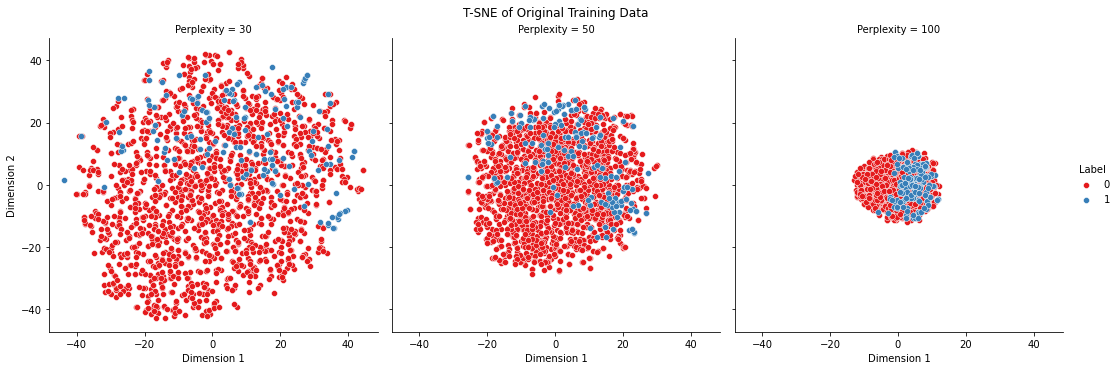

/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default init

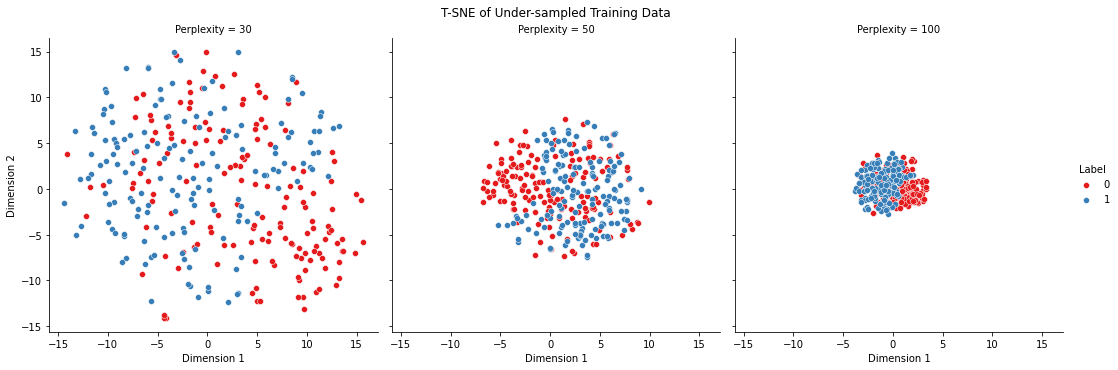

/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default init

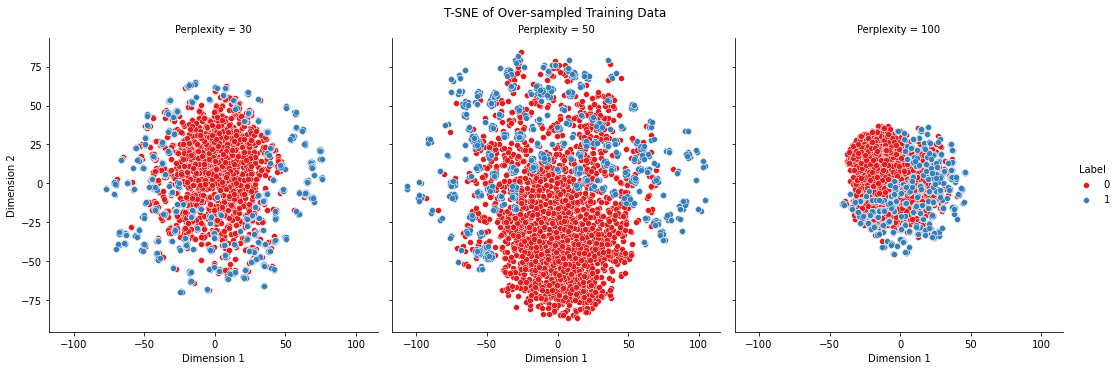

In [69]:
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE

def plot_tsne(X, y, title):
    # Create a DataFrame to hold the data
    data = pd.DataFrame()

    for perplexity in [30, 50, 100]:
        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
        X_tsne = tsne.fit_transform(X)
        
        # Adding the data to the DataFrame
        temp_df = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
        temp_df['Perplexity'] = perplexity
        temp_df['Label'] = y
        data = pd.concat([data, temp_df], ignore_index=True)

    # Using FacetGrid to create a grid of plots
    grid = sns.FacetGrid(data, col="Perplexity", hue="Label", palette="Set1", height=5)
    grid.map_dataframe(sns.scatterplot, x='Dimension 1', y='Dimension 2')
    grid.add_legend()
    grid.fig.suptitle(title, y=1.02)  # Adjust title position for better appearance
    plt.show()

# Call the function for original, under-sampled, and over-sampled data
plot_tsne(X_train, y_train, 'T-SNE of Original Training Data')
plot_tsne(X_train_rus, y_train_rus, 'T-SNE of Under-sampled Training Data')
plot_tsne(X_train_ros, y_train_ros, 'T-SNE of Over-sampled Training Data')
